In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
print("Primeiras 5 linhas do DataFrame:")
print(df.head())


Primeiras 5 linhas do DataFrame:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
print("\nInformações do DataFrame:")
print(df.info())


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
print("\nTamanho do DataFrame:", df.shape)


Tamanho do DataFrame: (1338, 7)


In [7]:
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Valores nulos por coluna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
has_duplicate = df.duplicated().any()
tt_duplicate = df.duplicated().sum()
if has_duplicate:
    print(f"\nO DataFrame possui {tt_duplicate} dado(s) duplicado(s)")
    print("Linhas duplicadas:")
    print(df[df.duplicated(keep=False)])
else:
    print("\nO DataFrame não possui dado(s) duplicado(s)")


O DataFrame possui 1 dado(s) duplicado(s)
Linhas duplicadas:
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


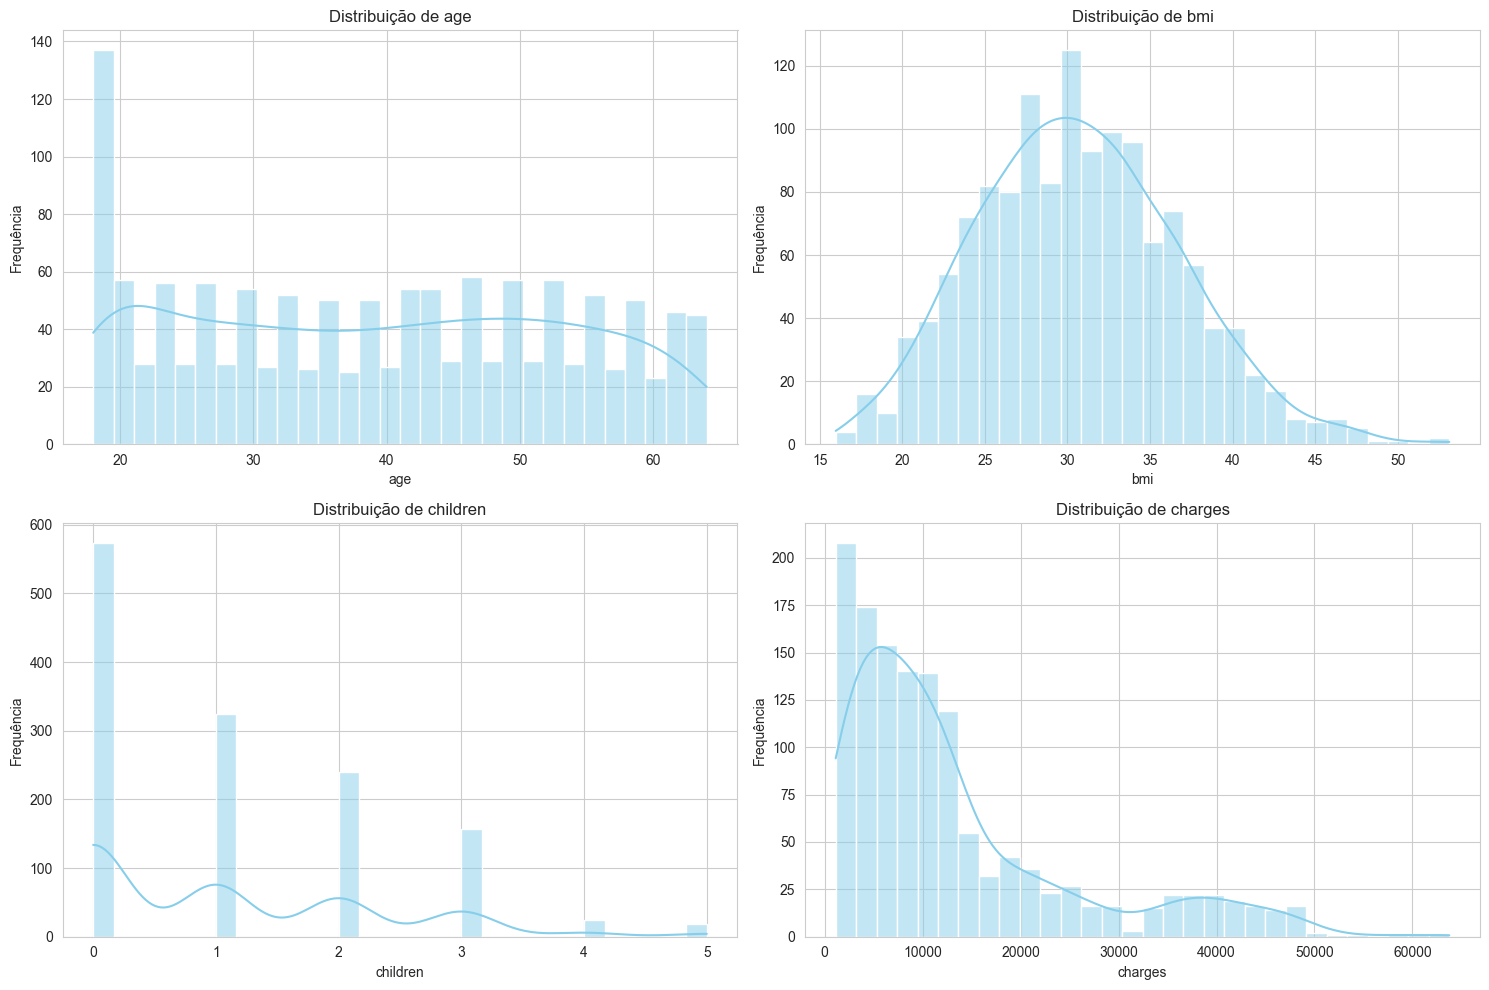

In [9]:
numerical_cols = ['age', 'bmi', 'children', 'charges']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

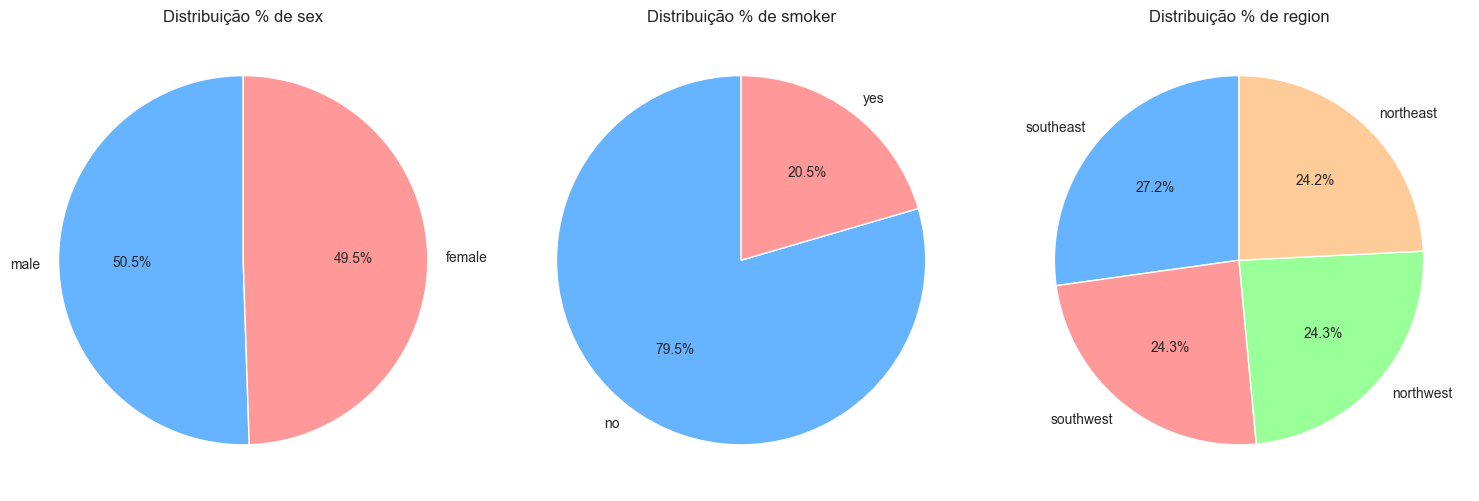

In [10]:
categorical_cols = ['sex', 'smoker', 'region']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    counts = df[col].value_counts(normalize=True) * 100
    counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])
    plt.title(f'Distribuição % de {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

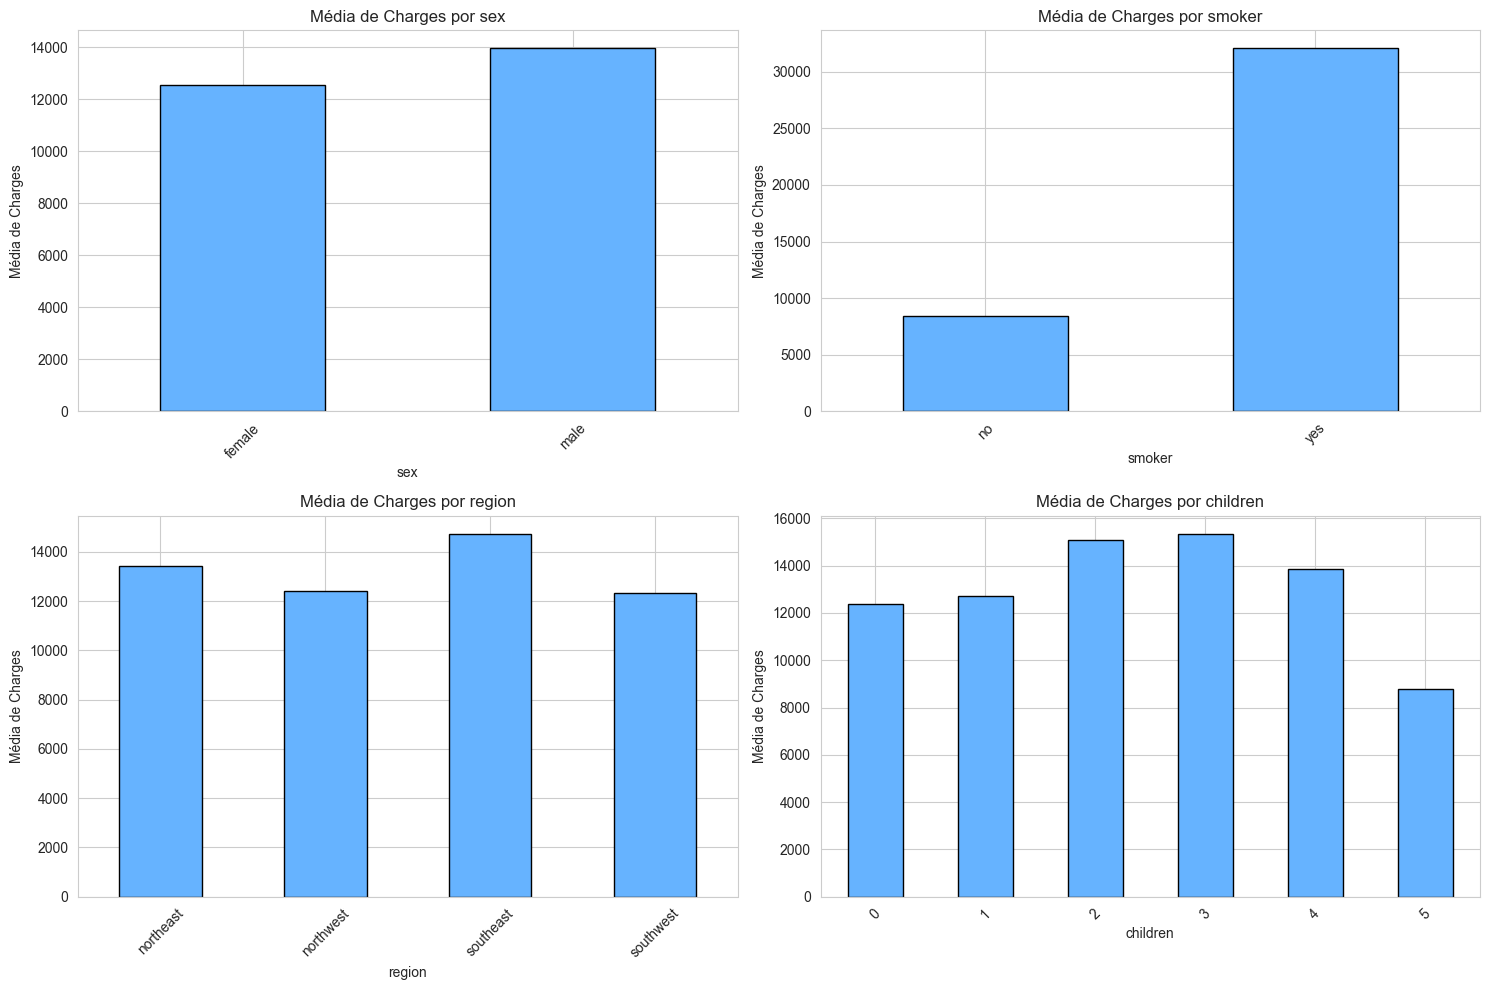

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols + ['children'], 1):
    plt.subplot(2, 2, i)
    mean_charges = df.groupby(col)['charges'].mean()
    mean_charges.plot.bar(color='#66b3ff', edgecolor='black')
    plt.title(f'Média de Charges por {col}')
    plt.xlabel(col)
    plt.ylabel('Média de Charges')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

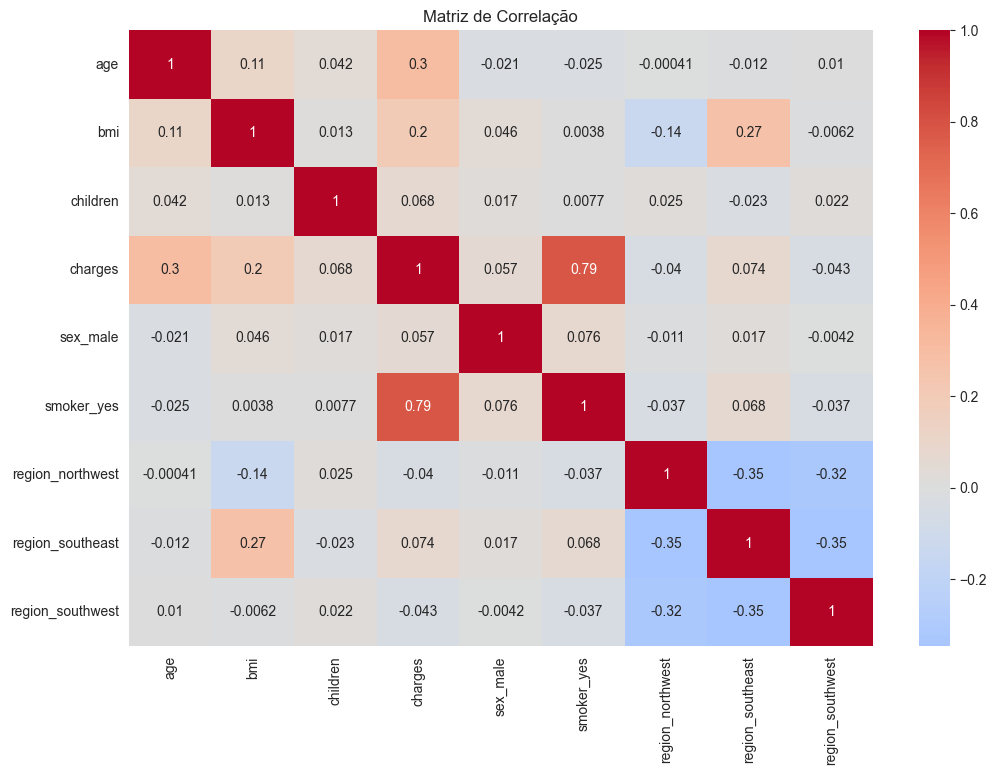

In [12]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()


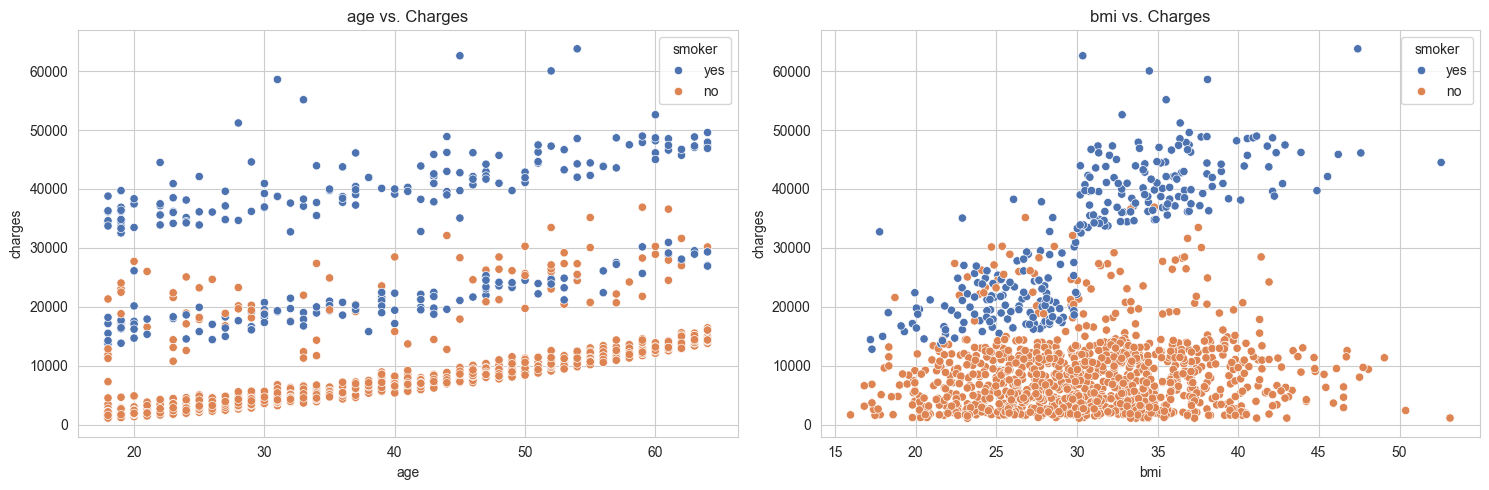

In [13]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['age', 'bmi'], 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker', palette='deep')
    plt.title(f'{col} vs. Charges')
plt.tight_layout()
plt.show()

In [14]:
df = df.drop_duplicates()
print("\nTamanho do DataFrame após remoção de duplicatas:", df.shape)


Tamanho do DataFrame após remoção de duplicatas: (1337, 7)


In [15]:
lbl_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = lbl_encoder.fit_transform(df[col])
print("\nDataFrame após codificação categórica:")
print(df.head())


DataFrame após codificação categórica:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [16]:
X = df.drop('charges', axis=1)
y = df['charges']
scaler = StandardScaler()
X[['age', 'bmi', 'children']] = scaler.fit_transform(X[['age', 'bmi', 'children']])
print("\nFeatures normalizadas (primeiras 5 linhas):")
print(X.head())
print("\nVariável target (primeiras 5 linhas):")
print(y.head())


Features normalizadas (primeiras 5 linhas):
        age  sex       bmi  children  smoker  region
0 -1.440418    0 -0.453160 -0.909234       1       3
1 -1.511647    1  0.509422 -0.079442       0       2
2 -0.799350    1  0.383155  1.580143       0       2
3 -0.443201    1 -1.305052 -0.909234       0       1
4 -0.514431    1 -0.292456 -0.909234       0       1

Variável target (primeiras 5 linhas):
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [17]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print(f"\nTamanho do conjunto de treino: {X_train.shape} ({X_train.shape[0]/df.shape[0]:.2%})")
print(f"Tamanho do conjunto de teste: {X_test.shape} ({X_test.shape[0]/df.shape[0]:.2%})")


Tamanho do conjunto de treino: (1069, 6) (79.96%)
Tamanho do conjunto de teste: (268, 6) (20.04%)


In [18]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=SEED)
rf = RandomForestRegressor(random_state=SEED, n_estimators=100)

In [19]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
print("\nModelos treinados: Regressão Linear, Árvore de Decisão, Random Forest")


Modelos treinados: Regressão Linear, Árvore de Decisão, Random Forest


In [20]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    return y_pred, rmse, r2

lr_pred, lr_rmse, lr_r2 = evaluate_model(lr, X_test, y_test, "Regressão Linear")
dt_pred, dt_rmse, dt_r2 = evaluate_model(dt, X_test, y_test, "Árvore de Decisão")
rf_pred, rf_rmse, rf_r2 = evaluate_model(rf, X_test, y_test, "Random Forest")


Regressão Linear:
RMSE: 5957.6088
R²: 0.8068

Árvore de Decisão:
RMSE: 6340.1510
R²: 0.7812

Random Forest:
RMSE: 4639.4810
R²: 0.8829


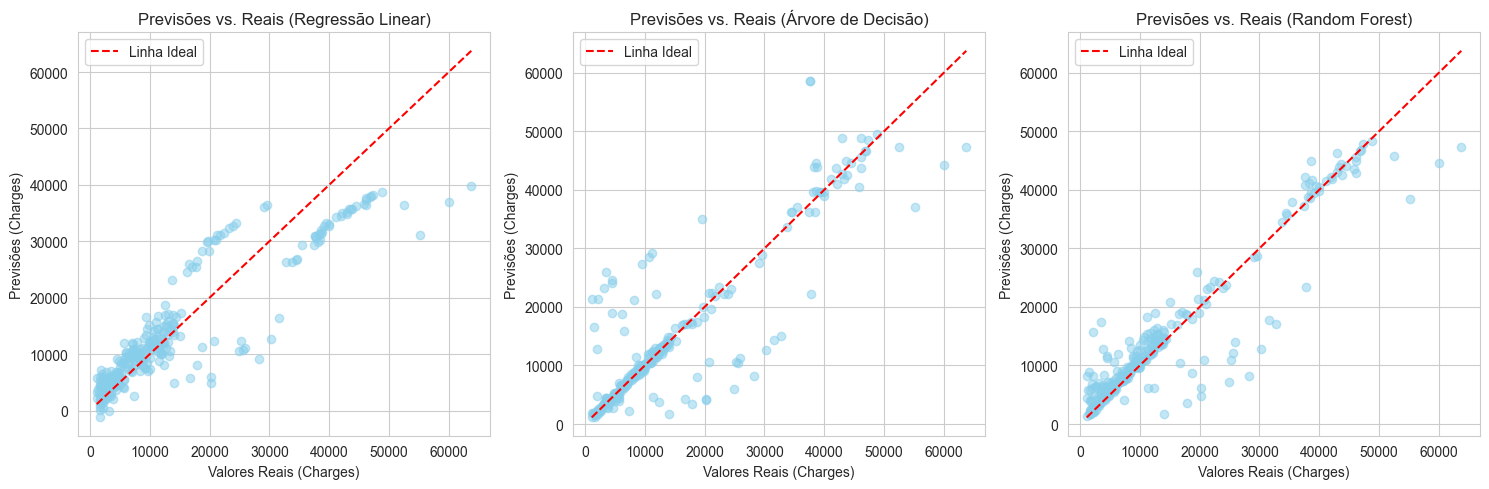

In [21]:
plt.figure(figsize=(15, 5))
for i, (y_pred, model_name) in enumerate([(lr_pred, 'Regressão Linear'), (dt_pred, 'Árvore de Decisão'), (rf_pred, 'Random Forest')], 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5, color='skyblue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Linha Ideal')
    plt.xlabel('Valores Reais (Charges)')
    plt.ylabel('Previsões (Charges)')
    plt.title(f'Previsões vs. Reais ({model_name})')
    plt.legend()
plt.tight_layout()
plt.show()